<a href="https://colab.research.google.com/github/Uzayisenga/4/blob/master/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class ="alert alert-block alert-success" style='text-align:center'>
<h2> K-means </h2>
</div>

In Machine learnign we have different types of learning like:
1. Supervised Learning
2. Unsupervised Learning
3. Reinforcement Learning

We have been seeing models that falls into the supervised learning category like Linear regression, logistic regression and svm, where the model knows what kind of output its looking for(labeled data).

Now lets look at one of the models that falls into unsupervised learning category, and this model is called **K-means**

**k-means** clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid)

<div class ="alert alert-block alert-warning" style='text-align:center'>
<h2> How does it work? </h2>
</div>

**The goal** of K-means is to take some un-labeled data and cluster them into **k** different clusters and each sample is assigned to the cluster with the nearest mean

What is **K**: k is the number of cluster centers

In simple words the k-means will group our data by creating central points of groups and grouping the samples depending on the nearest mean of a group

### The process behind
1. Initialize the cluster centers(centroids)
2. Repeat until converged(until there is no more change):
    - Update cluster labels: Assign points to the nearest cluster center
    - Update cluster center(centroid): Set the center to the mean of each cluster
    
It going to repeat this process as the number of iterations increases

<img src="https://drive.google.com/uc?id=1PChV1UWIHIWCEmV3lPXMJU01tFLSxm5A" style="height:500px">

### The math behind

The purpose of k-means is to find the samples and the centroids that minimize the SSE(sum of the squared error), because we are trying to make sure that our samples are closer to the centroids, so that we can make clusters

**SSE**
$$SSE=\sum_{n=1}^N \sum_{K=1}^K r_{nk} X_n-\mu_k^2$$

where
- $n$: Index of data points
- $k$: Cluster index
- $X_n$: $ n $ th data point
- $\mu_k$: $ k $ th center point
- $r_{nk}$: 1 if data point $ X_n $ belongs to cluster $ k $, 0 otherwise

In K-means, the closeness is the smaller euclidean distance between points. Euclidean distance is calculated by pythagorean theorems (three-square theorems), but for vector $p,q$ it can be expressed by the following formula:

**Euclidean distance**

$$||p,q||=\sqrt{(p-q)*(q-p)}$$

There is also a function of numpy that calculate this<br>
[np.linalg.norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html)

### Coding

<div class ="alert alert-block alert-success" style='text-align:center'>
<h2> K-means from scikit-learn</h2>
</div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
from sklearn.cluster import KMeans

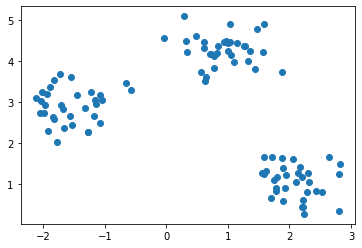

In [ ]:
# Creating our own data
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])

-30.870531280140696

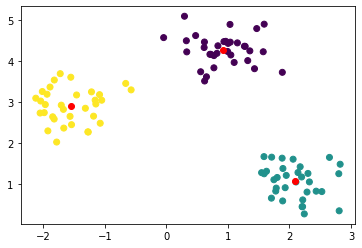

In [ ]:
model = KMeans(n_clusters=3)
model.fit(X)
model.predict(X)
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
model.score(X)

Text(0, 0.5, 'Cost of the model (Inertia)')

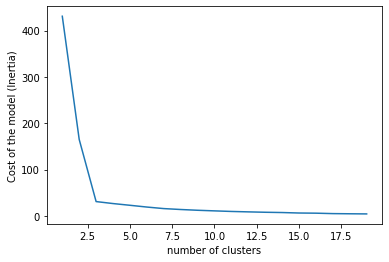

In [ ]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel('number of clusters')
plt.ylabel('Cost of the model (Inertia)')

<div class ="alert alert-block alert-success" style='text-align:center'>
<h2> K-means from scratch</h2>
</div>

Lets try to see how to obtain the SSE, distance and initial value of the centroids 

In [ ]:
# Importing dependencies
from sklearn.datasets import make_blobs
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# get the dataset
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [ ]:
n_clusters = 4
a = range(X.shape[0])
np.random.seed(0)
first_point = np.random.choice(a, n_clusters, replace=False)
init = X[first_point,:]

In [ ]:
def obtain_SSE(X):
    dist = np.zeros((X.shape[0], n_clusters))
    for l in range(n_clusters):
        d_a = abs(X - init[l,:])
        d_a2 = d_a ** 2
        d_a3 = np.sum(d_a2, axis=1)
        dist[:,l] = d_a3 
    SSE = 0
    clster = np.argmin(dist,axis=1)
    for i in range(n_clusters):
        SSE += np.sum(np.min(dist[clster==i],axis=1))
        init[i,:] = np.mean(X[clster==i], axis=0)
    return dist, SSE, init

In [ ]:
dist, sse, init = obtain_SSE(X)
print(init)

[[-1.24587768  3.22980708]
 [ 1.99186903  0.96561071]
 [ 1.06148307  4.39922699]
 [-1.26811733  7.76378266]]


In [ ]:
print(sse)

84.33640249455568


In [ ]:
print(dist)

[[1.65763058e+00 8.55890067e+00 8.28397078e-01 1.80103044e+01]
 [2.03503003e+01 6.18610755e+01 2.35634932e+01 6.54839934e-01]
 [4.19405850e+00 1.19003431e+01 0.00000000e+00 1.64710622e+01]
 [3.31850587e+00 1.30395852e+01 1.08282823e-01 1.41975027e+01]
 [6.20659909e+00 1.58511794e+01 3.47030318e-01 1.46940734e+01]
 [2.06173754e+00 1.10972185e+01 3.74624567e-01 1.51552807e+01]
 [1.98402580e+00 2.13656863e+01 1.12264017e+01 1.33994022e+01]
 [1.78609620e+01 5.40217640e+01 1.68908134e+01 4.07442243e-01]
 [3.10188153e+00 2.11566301e+01 2.35830414e+00 6.69836920e+00]
 [1.72167740e+01 5.53410632e+01 1.90122437e+01 9.18947532e-02]
 [1.14806913e+01 4.36507582e+01 1.23092745e+01 3.03503341e-01]
 [1.29929055e+01 4.89150783e+01 1.69236018e+01 4.00797376e-01]
 [1.34050712e+01 4.82748799e+01 1.52225247e+01 4.62943832e-02]
 [1.69181548e+01 5.32939298e+01 1.69501983e+01 1.55193397e-01]
 [1.49011447e+01 4.92429535e+01 1.46307685e+01 1.96001780e-01]
 [2.44846073e+01 2.43644463e+00 1.98363386e+01 7.058040

#### k-means from scratch

We will start by defining our class
```
class ScratchKMeans():
```

#### init constructor

We will start by initializing the constructor in order to make our class take in some parameters that we will later on use in the training phase of our model

```
def __init__(self, n_clusters, max_iter, verbose=False, tol=5, seed=0):
    self.n_clusters = n_clusters
    self.seed = seed
    self.max_iter = max_iter
    self.tol= tol
    self.verbose = verbose
```

Where:
- n_clusters: is the number of clusters we want our model to come up with
- seed: is the seed value that we are going to use when we are randomly generating our values
- max_iter: is the maximum number of iterations
- tol: is going to be stopping criteria, when we feel like the model is done creating the clusters
- verbose: is a boolean value to know if we print the values as the model is learning

#### fit function

Our fit function will only take in **X** values instead of **X,y** like other models, since in the cases where we use this model we don't know the labels
```
def fit(self, X):
```

We will start by initializing the values and declaring variables that we are going to be using <br>

we will start by getting the values that we are going to use in randomly generating the first position of our centroids and store the positions and later we will be updating these positions
```
self.a = range(X.shape[0])
np.random.seed(self.seed)
self.first_point = np.random.choice(self.a, self.n_clusters, replace=False)
self.first_co = X[self.first_point,:] 
self.new_co = np.zeros((self.n_clusters, X.shape[1]))
```

Because we also needs to calculate the **SSE** we will create a list that we will use to store the values in
```
self.SSE_Rec = []
```

<div class ="alert alert-block alert-warning" style='text-align:center'>
<h2> Learning phase </h2>
</div>

Depending on the **max_iter** value that we have set, we will loop the codes for training our model
```
for i in range(self.max_iter): 
```

in our loop we will start by generating ndarrays that we will use to store values using the broadcast method. we will be storing the distances in them
```
self.dist = np.zeros((X.shape[0], self.n_clusters))
self.yk =  np.zeros((X.shape[0], self.n_clusters))
```

Because we are creating a specific number of cluster, we are going to create another loop inside the iterations that will loop the number of **n_clusters** in order to calculate the distance between our samples and our the centroids
```
for l in range(self.n_clusters):
    self.d_a = abs(X - self.first_co[l,:])
    self.d_a2 = self.d_a ** 2
    self.d_a3 = np.sum(self.d_a2, axis=1) 
    self.dist[:,l] = self.d_a3
    for j in range(X.shape[0]):
       self.yk[j,l] = np.linalg.norm(X[j,:] - self.first_co[l,:]) 
```

We will get the cluster dependening on those distances but this cluster will be updated as the number of iterations goes on, we will be updating it below
```
self.SSE = 0 
self.clster = np.argmin(self.yk, axis=1)
```

Lets update our centroids positions and calculate the **SSE**
```
for i in range(self.n_clusters):
    self.SSE += np.sum(np.min(self.dist[self.clster==i],axis=1))
    self.first_co[i,:] = np.mean(X[self.clster==i],axis=0)
```

as the number of iterations increase, we need to check if the positions are not changing so that we can stop our loop and those are called **Stoping criterias** 

1. we will check if the distances between our centroids are very small by using our stopping criteria we gave to our model as a parameter, is yes we will stop the learning phase<br>

2. We will check if the last position is equal to the new position, this will mean that our centroids are not changing positions anymore
```
if np.mean(np.sqrt(np.sum(abs(self.first_co**2 - self.new_co**2), axis=1))) <= self.tol: 
                break
```
```
if (self.first_co == self.new_co).all == True:
    break
else:
    self.new_co = np.copy(self.first_co)
```

After we will save our **SSE** and if verbose is set to true we will display the **SSE** values as the number of iterations increases

```
    self.SSE_Rec.append(self.SSE)
            
if self.verbose:
    print(self.SSE_Rec)
```

Lastly we will return our cluster

```
return self.clster
```

In [ ]:
class ScratchKMeans():

    def __init__(self, n_clusters, max_iter, verbose=False, tol=5, seed=0):  #n_init,  tol,
        self.n_clusters = n_clusters
        self.seed = seed
        self.max_iter = max_iter
        self.tol= tol
        self.verbose = verbose

    def fit(self, X):
        self.a = range(X.shape[0])
        np.random.seed(self.seed)
        self.first_point = np.random.choice(self.a, self.n_clusters, replace=False)
        self.first_co = X[self.first_point,:] 
        self.new_co = np.zeros((self.n_clusters, X.shape[1]))
        self.SSE_Rec = []
        
        for i in range(self.max_iter):        
            self.dist = np.zeros((X.shape[0], self.n_clusters))
            self.yk =  np.zeros((X.shape[0], self.n_clusters))
            
            for l in range(self.n_clusters):
                self.d_a = abs(X - self.first_co[l,:])
                self.d_a2 = self.d_a ** 2
                self.d_a3 = np.sum(self.d_a2, axis=1) 
                self.dist[:,l] = self.d_a3
                for j in range(X.shape[0]):
                    self.yk[j,l] = np.linalg.norm(X[j,:] - self.first_co[l,:]) 
                
            self.SSE = 0 
            self.clster = np.argmin(self.yk, axis=1)
        
            for i in range(self.n_clusters):
                self.SSE += np.sum(np.min(self.dist[self.clster==i],axis=1))
                self.first_co[i,:] = np.mean(X[self.clster==i],axis=0)
  
            if np.mean(np.sqrt(np.sum(abs(self.first_co**2 - self.new_co**2), axis=1))) <= self.tol: 
                break
                
            if (self.first_co == self.new_co).all == True:
                break
            else:
                self.new_co = np.copy(self.first_co)
            self.SSE_Rec.append(self.SSE)
            
        if self.verbose:
            print(self.SSE_Rec)
  
        return self.clster

In [ ]:
KM = ScratchKMeans(n_clusters = 4, max_iter = 10, verbose=True, tol=0.05)
KM.fit(X)

[84.33640249455568, 50.912773104155825]


array([2, 3, 2, 2, 2, 2, 0, 3, 2, 3, 3, 3, 3, 3, 3, 1, 1, 0, 0, 1, 2, 3,
       0, 1, 2, 0, 0, 2, 1, 1, 1, 3, 1, 1, 0, 2, 3, 1, 3, 0, 2, 0, 3, 0,
       0, 3, 1, 0, 2, 2, 2, 1, 0, 0, 0, 3, 3, 1, 1, 3, 3, 1, 1, 2, 1, 3,
       0, 0, 1, 2, 3, 1, 2, 3, 2, 2, 0, 0, 1, 1, 1, 3, 0, 2, 1, 0, 1, 1,
       2, 2, 2, 0, 2, 0, 0, 3, 3, 0, 3, 2], dtype=int64)

<div class ="alert alert-block alert-warning" style='text-align:center'>
<h2> Prediction phase </h2>
</div>

#### prediction function
```
def predict(self, X):
```

We will also start by creating our ndarray that we will later use
```
self.pre_dist = np.zeros((X.shape[0], self.n_clusters))
```

and depending on the number of clusters we want, we will loop and predict the distances using the eucledian distance function from numpy 
```
for l in range(self.n_clusters):
    for j in range(X.shape[0]):
        self.pre_dist[j,l] = np.linalg.norm(X[j,:] - self.new_co[l,:]) 
```

after calculating the distances, we can calculate the cluster depending on the sample distance to the centroids and we will group them depending on the shortest distance
```
self.pre_clster = np.argmin(self.pre_dist,axis=1)
```

lastly we will return our predicted cluster
```
return self.pre_clster
```

In [ ]:
class ScratchKMeans():

    def __init__(self, n_clusters, max_iter, verbose=False, tol=5, seed=0):  #n_init,  tol,
        self.n_clusters = n_clusters
        self.seed = seed
        self.max_iter = max_iter
        self.tol= tol
        self.verbose = verbose



    def fit(self, X):
        self.a = range(X.shape[0])
        np.random.seed(self.seed)
        self.first_point = np.random.choice(self.a, self.n_clusters, replace=False)
        self.first_co = X[self.first_point,:] 
        self.new_co = np.zeros((self.n_clusters, X.shape[1]))
        self.SSE_Rec = []
        
        for i in range(self.max_iter):        
            self.dist = np.zeros((X.shape[0], self.n_clusters))
            self.yk =  np.zeros((X.shape[0], self.n_clusters))
            
            for l in range(self.n_clusters):
                self.d_a = abs(X - self.first_co[l,:])
                self.d_a2 = self.d_a ** 2
                self.d_a3 = np.sum(self.d_a2, axis=1) 
                self.dist[:,l] = self.d_a3
                for j in range(X.shape[0]):
                    self.yk[j,l] = np.linalg.norm(X[j,:] - self.first_co[l,:]) 
                
            self.SSE = 0 
            self.clster = np.argmin(self.yk, axis=1)
        
            for i in range(self.n_clusters):
                self.SSE += np.sum(np.min(self.dist[self.clster==i],axis=1))
                self.first_co[i,:] = np.mean(X[self.clster==i],axis=0)
  
            if np.mean(np.sqrt(np.sum(abs(self.first_co**2 - self.new_co**2), axis=1))) <= self.tol: 
                break
                
            if (self.first_co == self.new_co).all == True:
                break
            else:
                self.new_co = np.copy(self.first_co)
            self.SSE_Rec.append(self.SSE)
            
        if self.verbose:
            print(self.SSE_Rec)
  
        return self.clster

    def predict(self, X):
        self.pre_dist = np.zeros((X.shape[0], self.n_clusters))
        for l in range(self.n_clusters):
            for j in range(X.shape[0]):
                self.pre_dist[j,l] = np.linalg.norm(X[j,:] - self.new_co[l,:])     
        self.pre_clster = np.argmin(self.pre_dist,axis=1)
        return self.pre_clster

In [ ]:
KM = ScratchKMeans(n_clusters = 4, max_iter = 10, verbose=True, tol=0.05)
KM.fit(X)
cl = KM.predict(X)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(X[:,0][cl==0], X[:,1][cl==0], c='blue')
ax.scatter(X[:,0][cl==1], X[:,1][cl==1], c='red')
ax.scatter(X[:,0][cl==2], X[:,1][cl==2], c='purple')
ax.scatter(X[:,0][cl==3], X[:,1][cl==3], c='pink')

ax.set_xlabel('x0')
ax.set_ylabel('y1')
ax.grid(True)

fig.show()

NameError: ignored

Now that we can see that our model is creating the clusters well,
lets check if the SSE is being minimized as it should be

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(X, _, test_size=0.3, random_state=0)
KM = ScratchKMeans(n_clusters = 4, max_iter = 15, verbose=True, tol=0, seed=1)
KM.fit(X_train)

As we can the SSE is being minimized <br>
[445.34442338044715, 150.94139280748257, 133.768643548361, 57.09421170745124]

We have seen that we must give our model the number of clusters to make, but how do you come up with the best number of clusters, there are various methods you can use like looking at your data and see how many clusters that you want but it might be difficult when you have a lot of data and sometimes they might be all over the place that you can't really tell by just looking at them.<br>

lets see a method called **Elbow method** that can help you determing the best number of clusters<br>

**Elbow method**: The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters<br>

If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of k


In [ ]:
sse = []
n_cl = []
for i in range(1,8):
    n_cl.append(i)
    KM = ScratchKMeans(n_clusters = i, max_iter = 15, verbose=False, tol=0, seed=3)
    KM.fit(X)
    sse.append(KM.SSE)
plt.plot(n_cl, sse, marker="o", markersize=6, markeredgewidth=5, markeredgecolor="crimson", linewidth=4)

In this case we would consider 3 as the best n_cluster value

### Real data

Lets use the k-means on real data(find the link on diver)

This is data collected from customers by a wholesaler in Lisbon, Portugal. The contents are data on how many euros each customer buys milk and groceries each year. Customers are retail stores and restaurants. **Region** and **Channel** are peeped and K-means is used for monetary data.

In [ ]:
# import the data
Wholesale = pd.read_csv('Wholesale customers data.csv')
Wholesale.head()

On this dataset they have already grouped the customers depending on channel and region, so we are going to drop them so that we dont have known results

In [ ]:
Wholesale2 = Wholesale.drop(["Channel", "Region"], axis=1)
sc = StandardScaler()
Wholesale_std = sc.fit_transform(Wholesale2)

There are 6 features related to the amount of money, but we will reduce the dimensions for visualization. For this, we are going to use a sample code of **PCA** by scikit-learn.

**PCA**: Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space.

In [ ]:
pca = PCA(n_components = 2)
pca = pca.fit(Wholesale_std)
Wholesale_pca = pca.transform(Wholesale_std)

[0.44082893 0.72459292 0.84793705 0.94189209 0.98950481 1.        ]


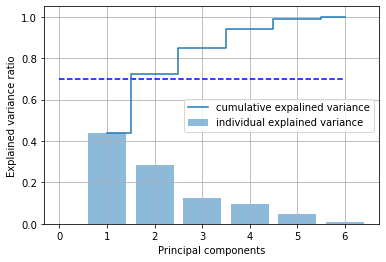

In [ ]:
# displays the distributed explanation rate of PCA
pca = PCA(n_components=None)
pca = pca.fit(Wholesale_std)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

##### Lets use the elbow method to check the best n_clusters

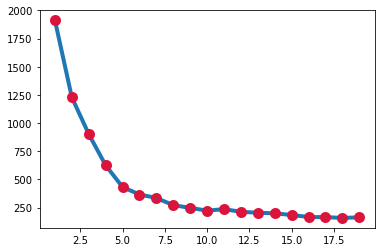

In [ ]:
sse = []
n_cl = []
for i in range(1,20):
    n_cl.append(i)
    KM = ScratchKMeans(n_clusters = i, max_iter = 15, verbose=False, tol=0, seed=3)
    KM.fit(Wholesale_pca)
    sse.append(KM.SSE)
plt.plot(n_cl, sse, marker="o", markersize=6, markeredgewidth=5, markeredgecolor="crimson", linewidth=4)

From the elbow method you can see that 5 might be the best n_clusters but lets run our model with visualizations to see if we can check the answer by look at the figures

<ipython-input-19-c2c829ac6a43>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


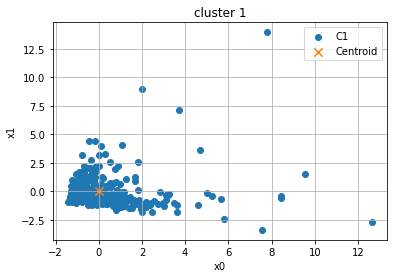

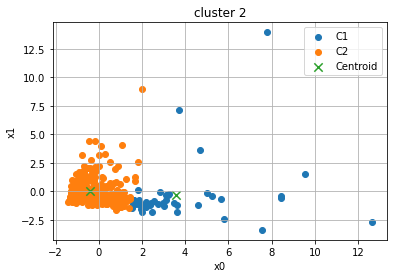

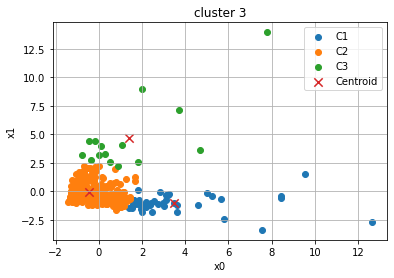

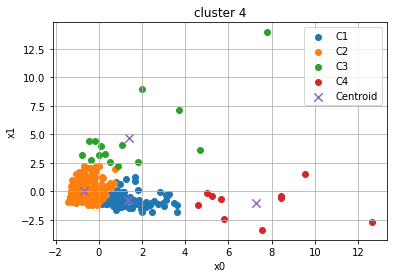

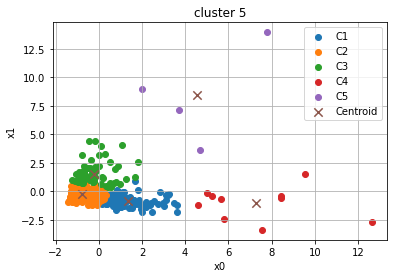

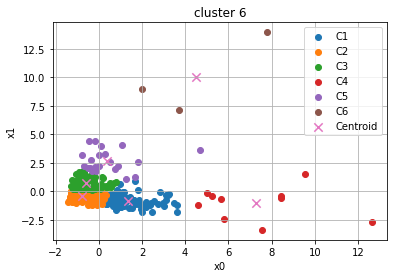

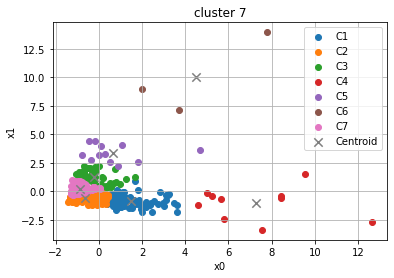

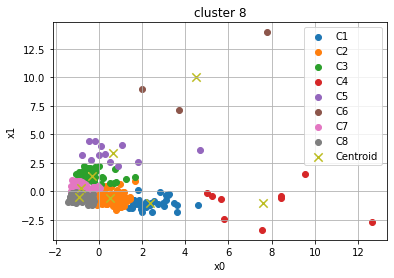

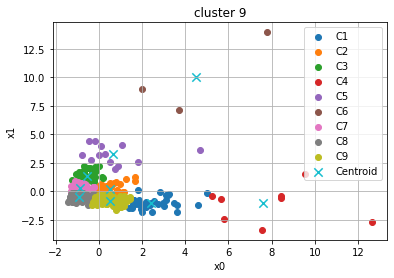

In [ ]:
for i in range(1,10):
    KM = ScratchKMeans(n_clusters = i, max_iter = 15, verbose=False, tol=0, seed=3)
    KM.fit(Wholesale_pca)
    cl = KM.predict(Wholesale_pca)
    
    fig = plt.figure()

    ax = fig.add_subplot(1,1,1)
    for i in range(np.unique(cl).shape[0]):
        ax.scatter(Wholesale_pca[:,0][cl==i], Wholesale_pca[:,1][cl==i], label='C{}'.format(i+1))
    ax.scatter(KM.new_co[:,0], KM.new_co[:,1], label="Centroid", s=70, marker='x')
    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    ax.set_title('cluster {}'.format(i+1))
    ax.grid(True)

    ax.legend(loc='upper right')
    fig.show()

Also from visualizing our data you can see that from 5 clusters you get a better separations of the data

### Lets compare our clusters to the known groups channel and region

**Our own clusters** vs **Region**

Lets check how many groups they have

In [ ]:
Wholesale.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

We have 3 groups, lets use it as our n_clusters too, to compare it well

<ipython-input-21-5fdb9383b336>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


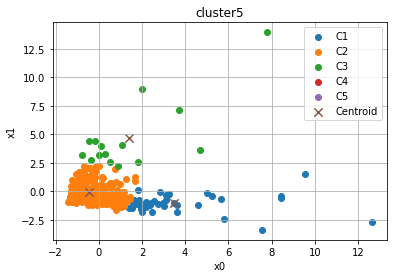

In [ ]:
ax = fig.add_subplot(1,1,1)
KM = ScratchKMeans(n_clusters = 3, max_iter = 15, verbose=False, tol=0, seed=3)
KM.fit(Wholesale_pca)
cl = KM.predict(Wholesale_pca) 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in range(5):
    ax.scatter(Wholesale_pca[:,0][cl==i], Wholesale_pca[:,1][cl==i], label='C{}'.format(i+1))
ax.scatter(KM.new_co[:,0], KM.new_co[:,1], label="Centroid", s=70, marker='x')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_title('cluster{}'.format(i+1))
ax.grid(True)
ax.legend(loc='upper right')

**Region**

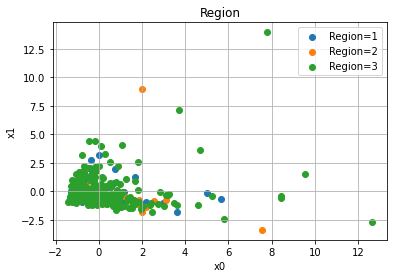

In [ ]:
Wholesale["Region"].unique()
plt.scatter(Wholesale_pca[:,0][Wholesale["Region"] == 1], Wholesale_pca[:,1][Wholesale["Region"] == 1], label = "Region=1")
plt.scatter(Wholesale_pca[:,0][Wholesale["Region"] == 2], Wholesale_pca[:,1][Wholesale["Region"] == 2], label = "Region=2")
plt.scatter(Wholesale_pca[:,0][Wholesale["Region"] == 3], Wholesale_pca[:,1][Wholesale["Region"] == 3], label = "Region=3")
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Region')
plt.grid(True)

plt.legend(loc='upper right')

We have a difference between the classification by region and the one by K-means. In fact, we have overlapping of regions between categories.

**Our own clusters** vs **Channel**

Lets check how many groups they have

In [ ]:
Wholesale.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

We have 2 groups, lets use it as our n_clusters too, to compare it well

<ipython-input-24-2db617dafa66>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


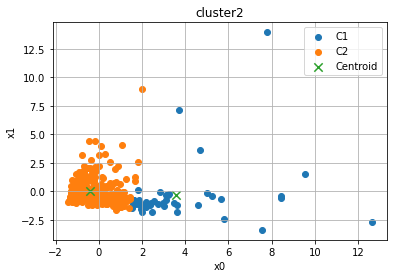

In [ ]:
ax = fig.add_subplot(1,1,1)
KM = ScratchKMeans(n_clusters = 2, max_iter = 15, verbose=False, tol=0, seed=3)
KM.fit(Wholesale_pca)
cl = KM.predict(Wholesale_pca)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in range(2):
    ax.scatter(Wholesale_pca[:,0][cl==i], Wholesale_pca[:,1][cl==i], label='C{}'.format(i+1))
ax.scatter(KM.new_co[:,0], KM.new_co[:,1], label="Centroid", s=70, marker='x')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_title('cluster{}'.format(i+1))
ax.grid(True)
ax.legend(loc='upper right')

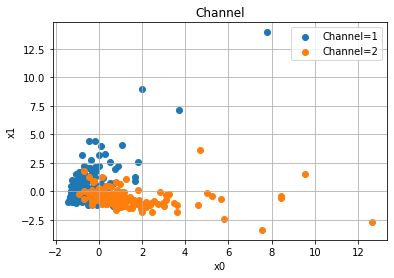

In [ ]:
Wholesale["Channel"].unique()
plt.scatter(Wholesale_pca[:,0][Wholesale["Channel"] == 1], Wholesale_pca[:,1][Wholesale["Channel"] == 1], label = "Channel=1")
plt.scatter(Wholesale_pca[:,0][Wholesale["Channel"] == 2], Wholesale_pca[:,1][Wholesale["Channel"] == 2], label = "Channel=2")
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Channel')
plt.grid(True)

plt.legend(loc='upper right')

- Classification by channel and the one by Region are also different here but we have less overlapping.

### Let's visualize the features vs the known groups

In [ ]:
Wholesale2["cluster"] = cl
Wholesale2.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1


##### Fresh

<ipython-input-27-cd48919572f6>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


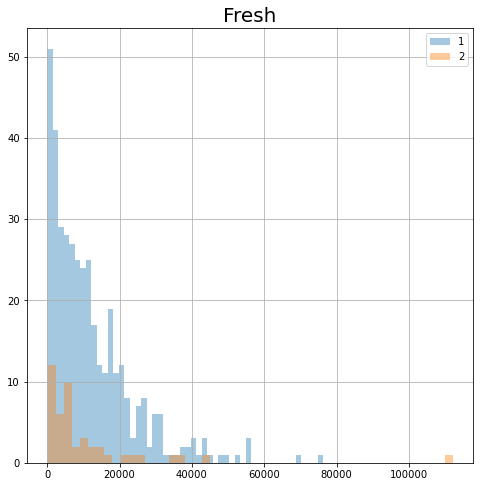

In [ ]:
Wholesale_cl1 = Wholesale[Wholesale2["cluster"] == 1]
Wholesale_cl0 = Wholesale[Wholesale2["cluster"] == 0]
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale_cl1["Fresh"],bins=50,alpha=0.4, label = "1")
ax1.hist(Wholesale_cl0["Fresh"],bins=50, alpha=0.4, label = "2")
ax1.set_title('Fresh',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

<ipython-input-28-1474584564b2>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


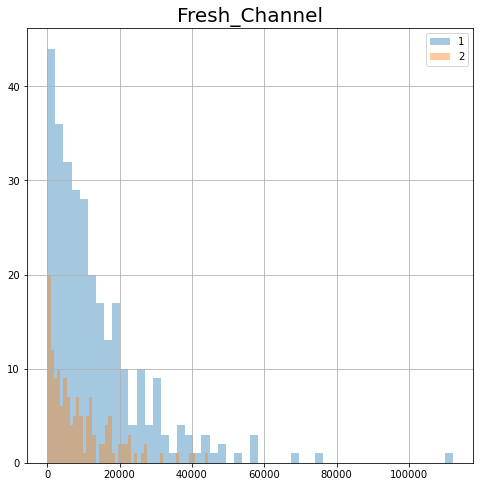

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale["Fresh"][Wholesale["Channel"] == 1],bins=50, alpha=0.4, label = "1")
ax1.hist(Wholesale["Fresh"][Wholesale["Channel"] == 2],bins=50,alpha=0.4, label = "2")
ax1.set_title('Fresh_Channel',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

##### Milk

<ipython-input-29-baf036748d91>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


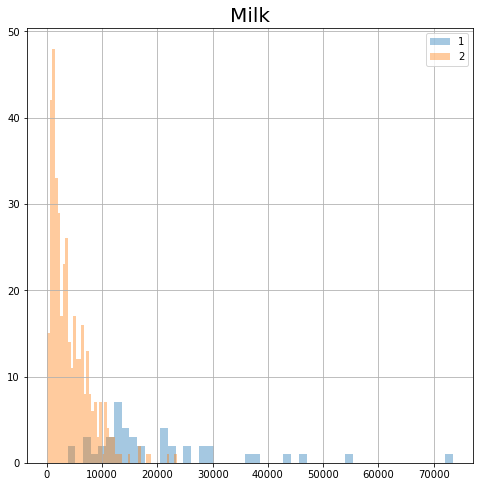

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale_cl0["Milk"],bins=50, alpha=0.4, label = "1")
ax1.hist(Wholesale_cl1["Milk"],bins=50, alpha=0.4, label = "2")
ax1.set_title('Milk',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

<ipython-input-30-df2f9c6af8f5>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


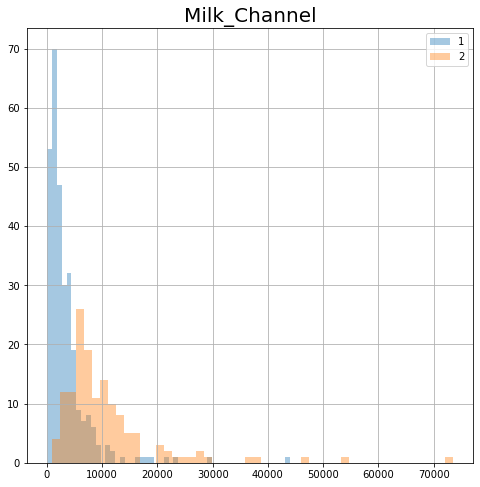

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale["Milk"][Wholesale["Channel"] == 1],bins=50, alpha=0.4, label = "1")
ax1.hist(Wholesale["Milk"][Wholesale["Channel"] == 2],bins=50,alpha=0.4, label = "2")
ax1.set_title('Milk_Channel',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

##### Grocery

<ipython-input-31-c0f91c829a70>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


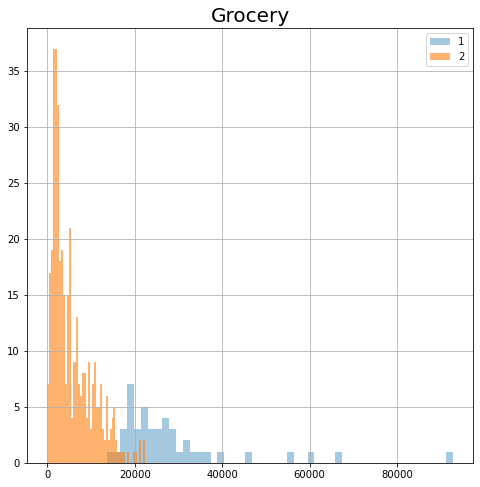

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale_cl0["Grocery"],bins=50, alpha=0.4, label = "1")
ax1.hist(Wholesale_cl1["Grocery"],bins=50, alpha=0.6, label = "2")
ax1.set_title('Grocery',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

<ipython-input-32-eb58e16bcafd>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


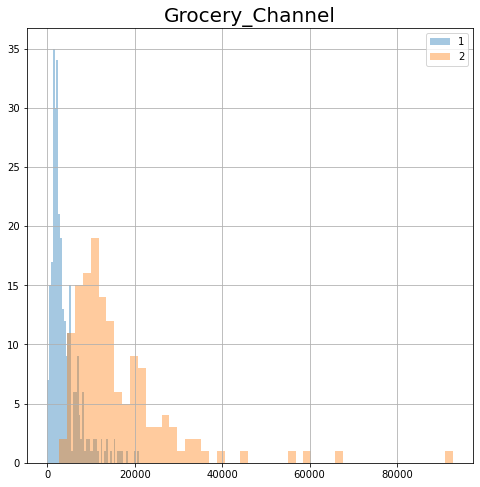

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale["Grocery"][Wholesale["Channel"] == 1],bins=50, alpha=0.4, label = "1")
ax1.hist(Wholesale["Grocery"][Wholesale["Channel"] == 2],bins=50,alpha=0.4, label = "2")
ax1.set_title('Grocery_Channel',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

##### Frozen

<ipython-input-33-b288cac5f9b5>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


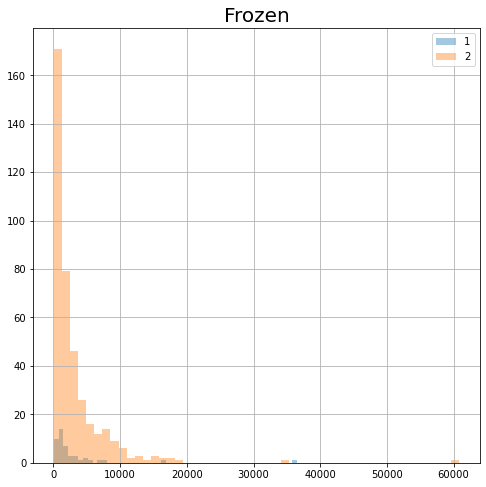

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale_cl0["Frozen"],bins=50, alpha=0.4, label = "1")
ax1.hist(Wholesale_cl1["Frozen"],bins=50, alpha=0.4, label = "2")
ax1.set_title('Frozen',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

<ipython-input-34-080d034ee5ea>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


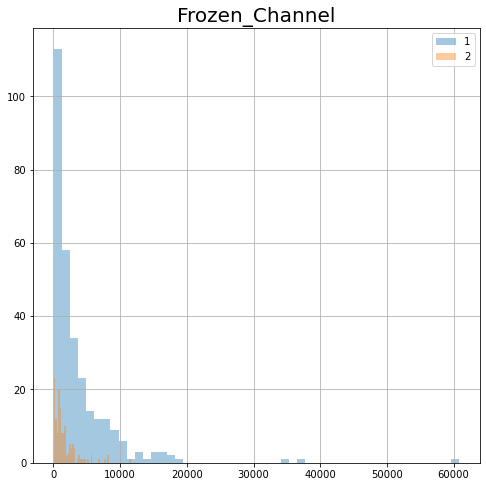

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale["Frozen"][Wholesale["Channel"] == 1],bins=50, alpha=0.4, label = "1")
ax1.hist(Wholesale["Frozen"][Wholesale["Channel"] == 2],bins=50,alpha=0.4, label = "2")
ax1.set_title('Frozen_Channel',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

##### Detergents_Paper

<ipython-input-35-96894d8896a5>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


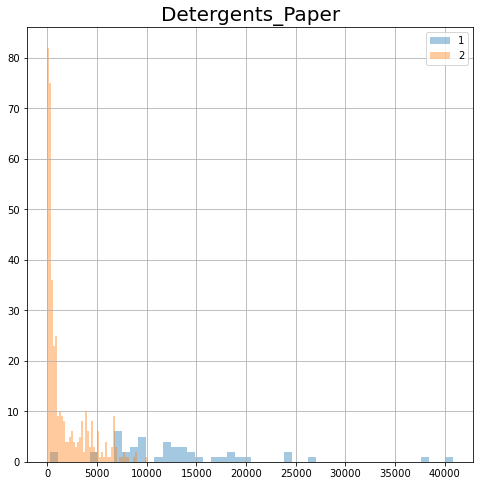

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale_cl0["Detergents_Paper"],bins=50, alpha=0.4, label = "1")
ax1.hist(Wholesale_cl1["Detergents_Paper"],bins=50, alpha=0.4, label = "2")
ax1.set_title('Detergents_Paper',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

<ipython-input-36-2d9d12c39235>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


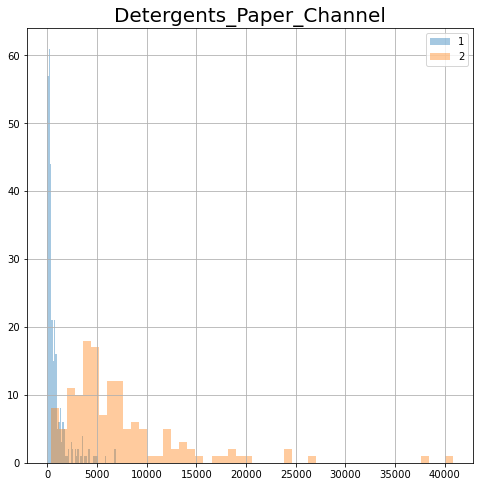

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale["Detergents_Paper"][Wholesale["Channel"] == 1],bins=50, alpha=0.4, label = "1")
ax1.hist(Wholesale["Detergents_Paper"][Wholesale["Channel"] == 2],bins=50,alpha=0.4, label = "2")
ax1.set_title('Detergents_Paper_Channel',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

##### Delicassen

<ipython-input-37-87a1c33e22bf>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


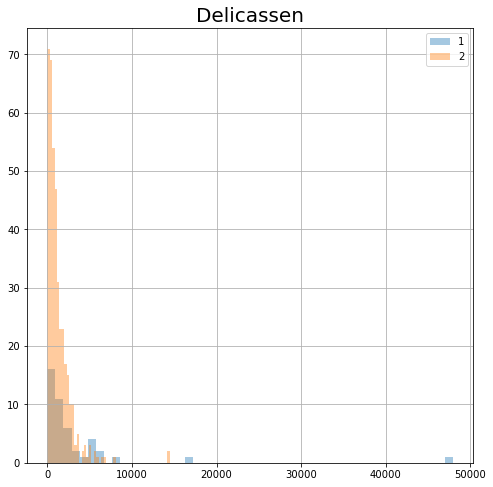

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale_cl0["Delicassen"],bins=50, alpha=0.4, label = "1")
ax1.hist(Wholesale_cl1["Delicassen"],bins=50, alpha=0.4, label = "2")
ax1.set_title('Delicassen',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

<ipython-input-38-4ec371749839>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


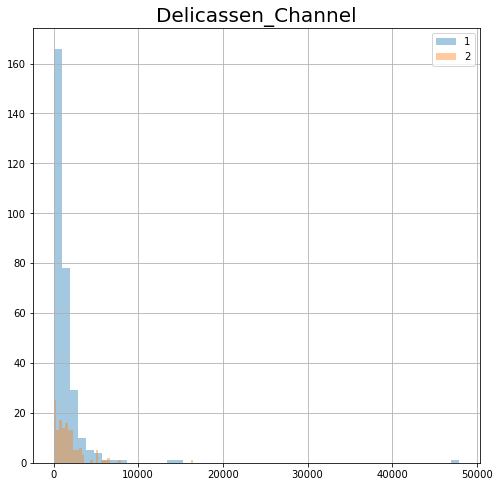

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(8,8))
ax1.hist(Wholesale["Delicassen"][Wholesale["Channel"] == 1],bins=50, alpha=0.4, label = "1")
ax1.hist(Wholesale["Delicassen"][Wholesale["Channel"] == 2],bins=50,alpha=0.4, label = "2")
ax1.set_title('Delicassen_Channel',size=20)
ax1.grid(True)
ax1.legend(loc='upper right')
fig.show()

#### Useful information for wholesalers

In [ ]:
Wholesale2 = pd.read_csv('Wholesale customers data.csv')
Wholesale3 = Wholesale2.drop(["Channel", "Region"], axis=1)
Wholesale3

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


Lets create custers and use it to check information from our dataset

In [ ]:
KM = ScratchKMeans(n_clusters = 5, max_iter = 15, verbose=False, tol=0, seed=3)
KM.fit(Wholesale_pca)
cl = KM.predict(Wholesale_pca)
data_cl0 = Wholesale3[cl==0]
data_cl1 = Wholesale3[cl==1]
data_cl2 = Wholesale3[cl==2]
data_cl3 = Wholesale3[cl==3]
data_cl4 = Wholesale3[cl==4]
cl_data=pd.DataFrame(cl)
cl_data = cl_data.rename(columns={0: "cluster"})
Wholesale_add_cl= pd.concat([Wholesale3, cl_data], axis=1)

#groupby
Wholesale_mean_cl = Wholesale_add_cl.groupby("cluster").mean()

In [ ]:
Wholesale_mean_cl.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,5282.846154,10403.164835,16838.901099,1266.384615,7436.967033,1505.923077
1,9148.992337,2866.084291,3816.011494,2036.333333,996.831418,930.072797
2,27618.486486,5158.810811,5552.851351,7501.054054,964.486486,2474.351351
3,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000
4,52022.000000,31696.000000,18490.750000,29825.500000,2699.000000,19656.250000


- Let's now distribute the ressources 

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

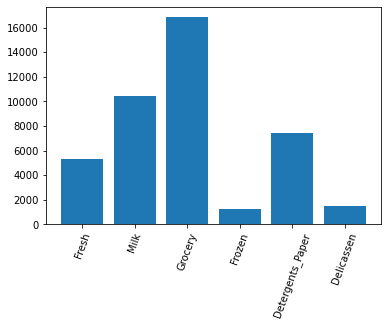

In [ ]:
height = np.array(Wholesale_mean_cl.iloc[0])
plt.bar(Wholesale_mean_cl.columns, height)
plt.xticks(rotation=70)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

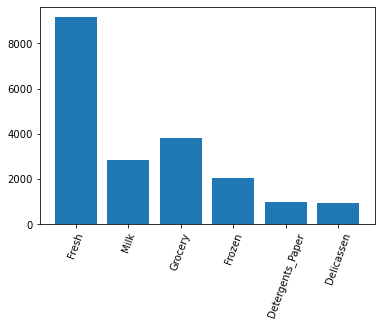

In [ ]:
height = np.array(Wholesale_mean_cl.iloc[1])
plt.bar(Wholesale_mean_cl.columns, height)
plt.xticks(rotation=70)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

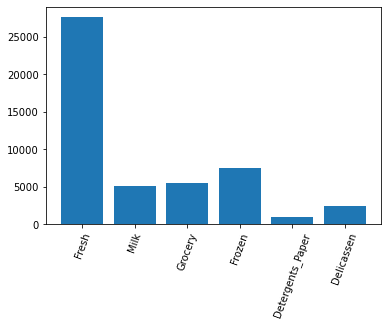

In [ ]:
height = np.array(Wholesale_mean_cl.iloc[2])
plt.bar(Wholesale_mean_cl.columns, height)
plt.xticks(rotation=70)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

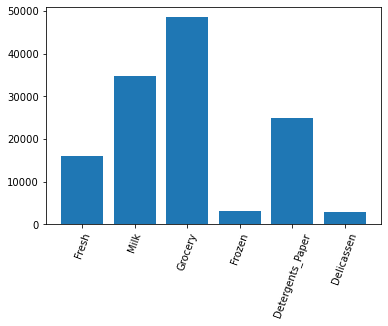

In [ ]:
height = np.array(Wholesale_mean_cl.iloc[3])
plt.bar(Wholesale_mean_cl.columns, height)
plt.xticks(rotation=70)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

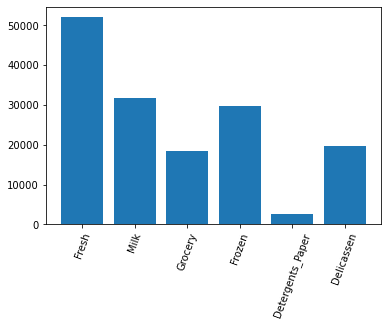

In [ ]:
height = np.array(Wholesale_mean_cl.iloc[4])
plt.bar(Wholesale_mean_cl.columns, height)
plt.xticks(rotation=70)

From the above distribution and the previous results, we see that Cluster 0 in term of price is higher (when we sum up the different prices). Clients in Cluster 1 have the highest for the Fresh. As for Cluster 4, Fresh, Milk and Frozen come in that order for highest purchases.